In [65]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import random

In [66]:
def rand(N=None, pct=None): #take in N and pct
    
    # if no inputs:
    if N is None:
        N = int(np.random.uniform(low=5, high=100))  
    if pct is None:
        pct = int(np.random.uniform(low=15, high=75))

    boardWidth = 50 #5 cm // 50 mm // X
    boardHeight = 50 #5 cm // 50 mm // Y
    boardArea = boardWidth * boardHeight

    components = {}
    placedComponents = []  # Store (x, y, width, height)
    
    # specific components. Just one for testing purposes
    electronics = {
        'block': {'min_width': 3, 'max_width': 10, 'min_height': 3, 'max_height': 20, 'color': 'red'},
    }

    count = 0
    tempArea = 0
    maxIter = 10000
    iteration = 0
    while (iteration < maxIter):
        coverage = tempArea / boardArea * 100
        coverageMin = coverage >= (pct - 5) #pct +/- 5% 
        coverageMax = coverage <= (pct + 5)


        if (count >= N) or ((coverageMin) and (coverageMax)):  #greater than pct - 5% and less than pct + 5%
            if coverageMin and coverageMax:
                print(f"Reached desired coverage: {coverage:.2f}% (which is within {pct - 5}% and {pct + 5}%)")
                break
            elif (count >= N):
                print(f"Reached desired number of components: {count}")
                break


        temp = 'block'
        info = electronics[temp]
        
        # random dimensions based on info given // uniform randomness
        width = np.random.uniform(low=info['min_width'], high=info['max_width']) # random size between 3 and 20 mm
        height = np.random.uniform(low=info['min_height'], high=info['max_height']) #random size between 3 and 40 mm
        
        placed = 0
        buffer = 1  # 1 mm buffer
        positionAttempts = 0
        # finding the left bottom corner position of each component to figure out collisions
        while placed == 0 and positionAttempts < maxIter:
            x = np.random.uniform(low=buffer, high=boardWidth - width - buffer) 
            y = np.random.uniform(low=buffer, high=boardHeight - height - buffer)
            
            # Check collisions with buffer // make this an algorithm for the report maybe !!!!!!!!!!!!!!!!!!!!!!!!!!!
            collision = 0
            for comp_x, comp_y, comp_w, comp_h in placedComponents:
                if ((x - buffer < comp_x + comp_w + buffer) and (x + width + buffer > comp_x - buffer) and (y - buffer < comp_y + comp_h + buffer) and (y + height + buffer > comp_y - buffer)):
                    collision = 1
                    positionAttempts += 1
                    break
            
            if collision == 0:
                components[f'{temp}{count}'] = {
                    'type': temp,  
                    'position': (x, y), 
                    'dimensions': (width, height), #no thickness for now 
                    'bounds': (x, y, x + width, y + height),
                    'color': info['color']  # Store the color with the component // for plotting purposes
                }
                placedComponents.append((x, y, width, height))
                placed = 1
                count += 1
                tempArea += (width * height)
                print(f"printed {count} components || iteration number {iteration}")
                break

        iteration += 1

        if iteration >= maxIter:
            print(f"Reached maximum iterations without satisfying conditions. Final coverage: {coverage:.2f}%. Final Component count: {count}")
            break
    
    return components, boardWidth, boardHeight



In [67]:
def plot(components, boardWidth, boardHeight):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
        
    # Draw board
    board = patches.Rectangle((0, 0), boardWidth, boardHeight, linewidth=2, edgecolor='black', facecolor='lightgray')
    ax.add_patch(board)
        
    for name, comp in components.items():         
        #get componenet position and dimensions
        x, y = comp['position']
        width, height = comp['dimensions']
        
        # draw each componenent on the board/graph
        rect = patches.Rectangle((x, y), width, height,linewidth=1, edgecolor='black', facecolor=comp['color'], alpha=0.7)
        ax.add_patch(rect) 
            
        # Add label
        ax.text(x + width/2, y + height/2, name, ha='center', va='center', fontsize=8)
        
    ax.set_xlim(-5, boardWidth + 5)
    ax.set_ylim(-5, boardHeight + 5)
    ax.set_aspect('equal')
    ax.set_title('Circuit Board Components Layout')
    ax.set_xlabel('Width (mm)')
    ax.set_ylabel('Height (mm)')
    plt.grid(True, alpha=0.3)
    plt.show()

printed 1 components || iteration number 0
printed 2 components || iteration number 1
printed 3 components || iteration number 2
printed 4 components || iteration number 3
printed 5 components || iteration number 4
printed 6 components || iteration number 5
printed 7 components || iteration number 6
printed 8 components || iteration number 7
printed 9 components || iteration number 8
printed 10 components || iteration number 9
printed 11 components || iteration number 10
printed 12 components || iteration number 11
printed 13 components || iteration number 13
printed 14 components || iteration number 14
printed 15 components || iteration number 28
printed 16 components || iteration number 46
printed 17 components || iteration number 82
printed 18 components || iteration number 214
printed 19 components || iteration number 220
printed 20 components || iteration number 347
Reached desired number of components: 20
Generated 20 components


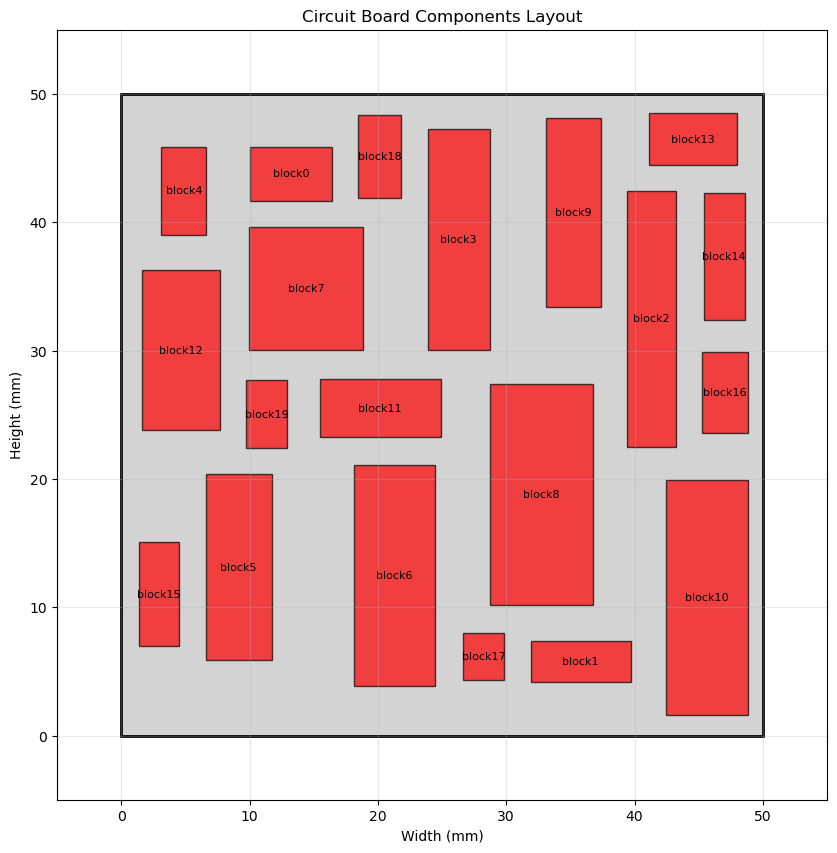

In [68]:
components, boardWidth, boardHeight = rand(20,100) #put 100 if you want a specific component count
print(f"Generated {len(components)} components")
plot(components, boardWidth, boardHeight)
